# PopGen Learning Guide

This is a learning document for PopGen software. It serves to assist PopGen users in understanding the key aspects of using software, from preparing input files to interpreting the results. **Note: All functions and algorithms in thie file are not part of PopGen software itself!!!**


This document is divided into four main parts:

- **Chapter 1: Input Files for PopGen**  
  Learn how to understand and visualize the input data. This includes detailed explanations of all sample files, marginal files, and mapping files necessary for PopGen.

- **Chapter 2: Prepare Configuration File**  
  Delve into the main structure of the configuration file. This chapter helps you understand how to properly set up the configuration file for running PopGen.

- **Chapter 3: Run PopGen**  
  Follow step-by-step instructions to run PopGen. 

- **Chapter 4: Results Interpretation**  
  Discover how to check the outputs and learn how to verify the accuracy of the results generated by PopGen.




# Install the Required Python Packages 

In [1]:
!pip install matplotlib 

In [2]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from functions import *
import os

In [3]:
 os.chdir('./../data/Arizona')

# Chapter 1. Input files for PopGen

## 1. Sample Inputs

Read the sample files:
- `household_sample.csv`
- `person_sample.csv`

In [4]:
household_sample = pd.read_csv('household_sample.csv')
person_sample = pd.read_csv('person_sample.csv')

### Household Sample Data

**Contents**: This file contains sample data at the household level, including:
 - A unique `household ID` for each record.
 - A `sample geographical unit ID` indicating the geographical unit of the sample.
 - Household-level control variables for both the **`region`** (upper spatial resolution) and **`geo`** (lower spatial resolution) levels.

**Variables**: Each record includes category values for household control variables, derived from the household marginal input data:
 - `hinc` : household income 
 - `hsize` : household size 
 - `hhtotals`: household total

  (variables may contain values such as `1`, `2`, or `3`, representing the marginal distribution categories at the geo level.)
  
**It's important to note that variable name with `"r"` denote regional variables.**

For example: 
- `rhsize` : region household size 

  (variables may contain values such as `1`, `2`, or `3`, representing the marginal distribution categories at the region level.)

In [5]:
household_sample.head()

,hid,sample_geo,hinc,hsize,rinc,rhsize,hhrtotals,hhtotals
0,2.012000e+12,204,3,2,3,2,1,1
1,2.012000e+12,204,3,1,3,1,1,1
2,2.012000e+12,300,4,5,4,5,1,1
3,2.012000e+12,400,2,1,2,1,1,1
4,2.012000e+12,113,5,5,5,5,1,1


### Person Sample Data:

The `person_sample` dataset includes a `household ID` and a `person ID` that together uniquely identify each person.  

This linkage indicates that individuals are grouped by the household they belong to from the above household sample

**Variables**:
- `ptotals`: total people 
  
- `empl`: employment status
  
- `page`: age of each person
  
- `psex`: sex of each individual

In [6]:
person_sample.head()

,hid,pid,sample_geo,ptotals,rptotals,empl,rempl,page,rpage,psex,rpsex
0,2.012000e+12,1,204,1,1,1,1,4,4,2,2
1,2.012000e+12,2,204,1,1,1,1,5,5,1,1
2,2.012000e+12,1,204,1,1,1,1,6,6,1,1
3,2.012000e+12,1,300,1,1,3,3,7,7,2,2
4,2.012000e+12,2,300,1,1,1,1,7,7,1,1


### Creating an Initial Frequency Matrix for IPU
The merging of household and person datasets can form a initial frequency matrix. This is not part of data prepartion but is good for visualizing the initail weighting table for IPU.

Here's an example from class:
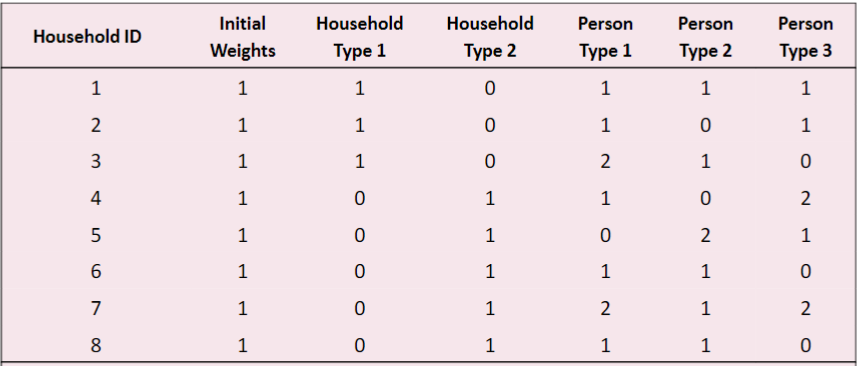


you can select the control variable belows to create different household-person jointed table

In [7]:
# Decide control variables 
household_vars = ['hinc']  # 'hsize' 
person_vars = ['psex']  

# Merge the selected control variables at household and personal level to create a frequency matrix for IPU 
IPU_Frequency_Matrix = merge_and_encode(household_sample, person_sample, household_vars, person_vars)
IPU_Frequency_Matrix.head()

,hid,psex_1,psex_2,hinc_1,hinc_2,hinc_3,hinc_4,hinc_5
0,2.012000e+12,1,1,0,0,1,0,0
1,2.012000e+12,1,0,0,0,1,0,0
2,2.012000e+12,2,3,0,0,0,1,0
3,2.012000e+12,1,0,0,1,0,0,0
4,2.012000e+12,4,1,0,0,0,0,1


## 2. Marginal Inputs for Popgen

Popgen uses marginal data at two spatial resolutions: **region** and **geo**. 

#### Geo-Level Marginals
- Files:
  - `person_marginals.csv`: Individual-level data.
  - `household_marginals.csv`: Household-level data.

#### Region-Level Marginals
- Files:
  - `region_person_marginals.csv`: Regional individual data.
  - `region_household_marginals.csv`: Regional household data.


In [8]:
# Define file paths for marginal data
# Key: Descriptive name used in the analysis.
# Value: Relative or absolute path to the CSV file. Paths can be adjusted as needed, e.g., './Arizona/person_marginals.csv'.
paths = {
    'person_marginal': 'person_marginals.csv',
    'household_marginal': 'household_marginals.csv',
    'region_person_marginal': 'region_person_marginals.csv',
    'region_household_marginal': 'region_household_marginals.csv'
}

# Use globals() to dynamically create variables from paths
for key, path in paths.items():
    globals()[key] = read_marginal_data(path)

In [9]:
household_marginal.head()

hhtotals hsize                              hinc                 \
                  1     1     2    3    4    5   6   7    1    2    3    4   
geo                                                                          
4013010101     2070   291  1386   85  188  105  15   0   45  224  584  256   
4013010102     2092   128  1810  101   39    0  14   0  162  202  176  238   
4013030401     2150   588  1422   22   65   42  11   0  162  282  367  262   
4013030402     1909   471  1028  201  153   34   0  22  201  294  370  229   
4013040502     2397   994   921  203  166   77  36   0  508  624  705  169   

                  
               5  
geo               
4013010101   961  
4013010102  1314  
4013030401  1077  
4013030402   815  
4013040502   391

In [10]:
region_household_marginal

hhrtotals  rhsize                                                 rinc  \
               1       1       2       3       4      5      6      7       1   
region                                                                          
1        1144732  329473  376283  165324  138494  74252  36062  24844  143126   
2          46627   13668   25304    3119    2504   1251    521    260    3798   
3           2591     863     856     297     231    171     82     91     533   
4           5905     929    2373     878     823    626    153    123     650   
5            852     155     108     113     140    110     64    162     212   
6          20806    3201    6176    3528    3906   2371   1045    579    1909   
7         143015   28954   47776   23275   24696  11400   4541   2373    7890   
8          97150   18549   39327   15465   14855   5698   2301    955    4976   
9           4162     419    3196     186     227    105     29      0     207   

                                        
             2       3       4       5  
region                                  
1       243231  380293  135267  242815  
2        10556   16644    6758    8871  
3          836     837     137     248  
4          874    1794     805    1782  
5          234     278      50      78  
6         3527    8386    3193    3791  
7        17097   40294   22367   55367  
8        10341   27551   14048   40234  
9          426     760     494    2275

In [11]:
region_person_marginal.head()

rptotals    rpsex            rpage                                  \
             1        1        2       1       2       3       4       5    
region                                                                      
1       3185704  1576885  1608819  216964  486554  175337  243279  476288   
2         99296    46907    52389    3287    8337    2291    2076    6239   
3          7272     3627     3645     505    1185     373     405    1110   
4         23238    14392     8846    1364    2788    1217    1426    3618   
5          4205     1966     2239     501     939     292     485     640   

                                                  rempl                  \
            6       7       8       9       10       1       2       3    
region                                                                    
1       415768  406138  348504  238248  178624  1472300  114159  895727   
2         7040    7253   14165   25617   22991    26907    1857   58908   
3          712    1030     829     611     512     2213     407    2962   
4         3719    3720    2914    1777     695     7490     402   11194   
5          405     459     280     161      43     1144     394    1227   

                
            4   
region          
1       703518  
2        11624  
3         1690  
4         4152  
5         1440

### Geographical Summary  for Marginal and Sample Data 

In [12]:
# Summary for Regional Marginal Data
regional_count = region_household_marginal.index.nunique()
regional_ids = ', '.join(map(str, region_household_marginal.index.unique()))
print(f"Regional marginal data has {regional_count} regions: [{regional_ids}]")

# Summary for Household Marginal Data
geo_count = household_marginal.index.nunique()
geo_ids = ', '.join(map(str, household_marginal.index.unique()[:5])) + ', ...'
print(f"Household marginal data has {geo_count} geos, including: [{geo_ids}]")

# Summary for Sample Data
sample_geo_count = household_sample['sample_geo'].nunique()
sample_geo_ids = ', '.join(map(str, household_sample['sample_geo'].unique()[:5])) + ', ...'
print(f"Sample data includes {sample_geo_count} unique sample geo IDs, such as: [{sample_geo_ids}]")

Regional marginal data has 9 regions: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Household marginal data has 916 geos, including: [4013010101, 4013010102, 4013030401, 4013030402, 4013040502, ...]
Sample data includes 54 unique sample geo IDs, such as: [204, 300, 400, 113, 109, ...]


## 3. Mapping Files

Following the Geographical Summary, the two marginal files and the Sample Data encompass three distinct geographical unit types. To facilitate analysis in Popgen, mapping files are required for each geographical unit type to ensure accurate alignment and integration of data across these different resolutions.

- **Region** is defined by census county subdivision 
- **Geo** is defined by census tracts
- **Sample _geo** is defined by Public Use Microdata Areas (PUMAs)

#### Mapping Files:
- `region_geo_mapping.csv`: Maps regional units to their corresponding geographical units.
- `geo_sample_mapping.csv`: Associates geographical units with specific sample IDs.

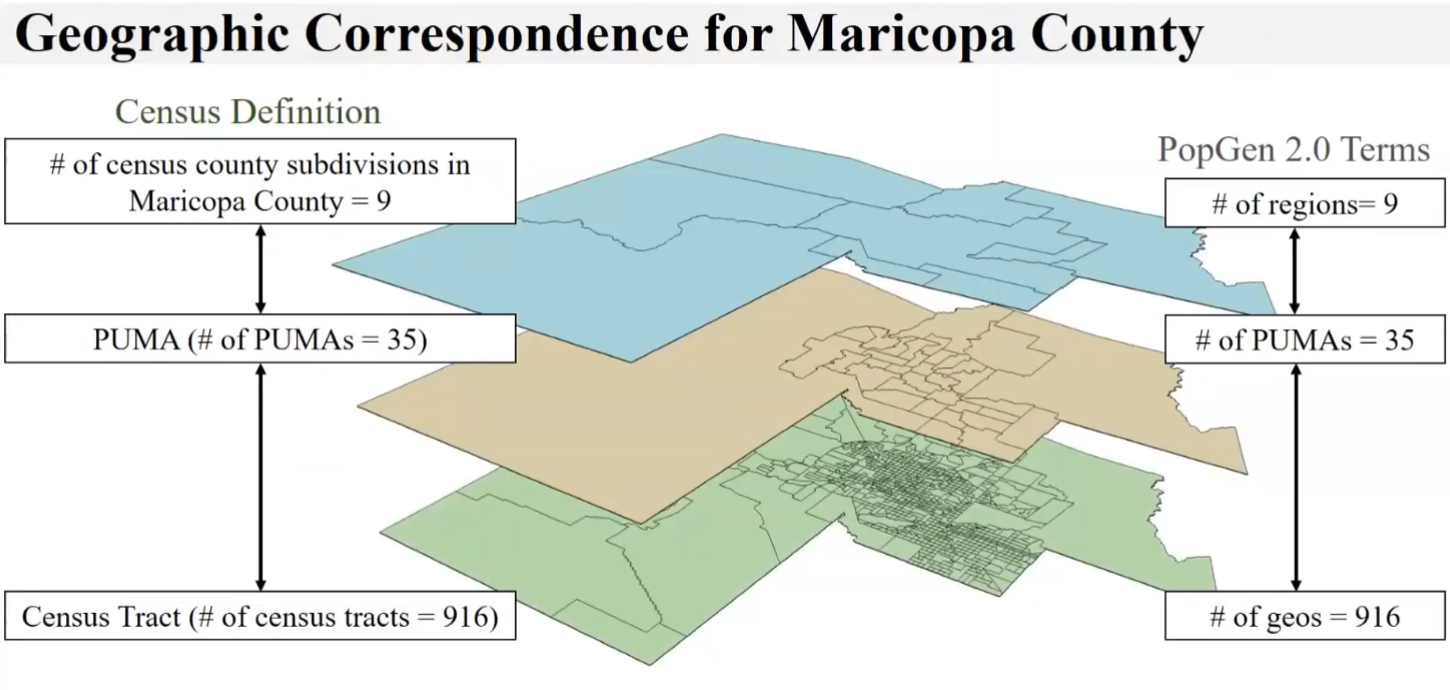

In [13]:
geo_sample_mapping = pd.read_csv('geo_sample_mapping.csv')
region_geo_mapping = pd.read_csv('region_geo_mapping.csv')

In [14]:
region_geo_counts = region_geo_mapping.groupby('region')['geo'].nunique().reset_index(name='total geo counts')
region_geo_counts.loc['Total'] = [region_geo_counts['region'].count(), region_geo_counts['total geo counts'].sum()]
print(region_geo_counts)

       region  total geo counts
0           1               720
1           2                23
2           3                 2
3           4                 8
4           5                 2
5           6                11
6           7                90
7           8                58
8           9                 2
Total       9               916


In [15]:
sample_geo_counts = geo_sample_mapping.groupby('sample_geo')['geo'].count().reset_index(name='total geo counts')
sample_geo_counts.loc['Total'] = [sample_geo_counts['sample_geo'].count(), sample_geo_counts['total geo counts'].sum()]
print(sample_geo_counts)

       sample_geo  total geo counts
0             100                22
1             101                37
2             102                34
3             103                27
4             104                26
5             105                30
6             106                25
7             107                27
8             108                24
9             109                23
10            110                33
11            111                24
12            112                26
13            113                25
14            114                25
15            115                23
16            116                29
17            117                28
18            118                36
19            119                23
20            120                25
21            121                26
22            122                22
23            123                24
24            124                24
25            125                22
26            126           

### Observation from Mapping Files:

As indicated by the mapping files, a total of **35** unique `sample_geo` identifiers exist, in contrast to the **54** found within the sample data (e.g., `household_sample.csv`).

This discrepancy highlights that only 35 `sample_geo` units are actively utilized and linked with the marginal data at both region and geo levels.

Consequently, this suggests that Maricopa County's analysis is focused on these 35 geographical units from the sample data, indicating a selective coverage area.



### Checking Consistency Between Regional and Geo Marginal Data

To check marginal data consistency across different spatial resolutions, we can group the geo-level marginal files—`household_marginal.csv` and `person_marginal.csv`—by their respective regions. 

Below present the grouped results for geo-level marginal, pls compare with the **`region_household_marginal`** DataFrame. 

This comparison confirms complete consistency between the geo-level data aggregated by regions and the directly obtained regional marginal data.


In [16]:
household_marginal_grouped_by_region = group_marginal_geo_by_region(household_marginal, region_geo_mapping)

print(household_marginal_grouped_by_region)

                  geo hhtotals   hsize                                        \
                             1       1       2       3       4      5      6   
region                                                                         
1       2889517662221  1144732  329473  376283  165324  138494  74252  36062   
2         92299931945    46627   13668   25304    3119    2504   1251    521   
3          8027882500     2591     863     856     297     231    171     82   
4         32110260633     5905     929    2373     878     823    626    153   
5          8027882100      852     155     108     113     140    110     64   
6         44143556866    20806    3201    6176    3528    3906   2371   1045   
7        361240376333   143015   28954   47776   23275   24696  11400   4541   
8        232788397403    97150   18549   39327   15465   14855   5698   2301   
9          8026020203     4162     419    3196     186     227    105     29   

                 hinc                  

/home/jovyan/popgen_learning/functions.py:111: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  household_marginal_grouped_by_region = household_marginal_copy.groupby('region').sum()


## 4. Compare Sample and Marginal Distribution

To see how the sample distribution compares with Marginal distribution, follow these steps:

1. **Run**: Click `Run`.
2. **Region**: Type `'region'`, then press `Enter`.
3. **Region ID**: Enter `8` and hit `Enter`.
4. **Variable**: Type `'rhsize'`, press `Enter`.

This checks the household size in Region 8 against the sample.


Please enter 'geo' or 'region':  region
Please enter the geographical area code:  8
Please enter the control variable:  rhsize


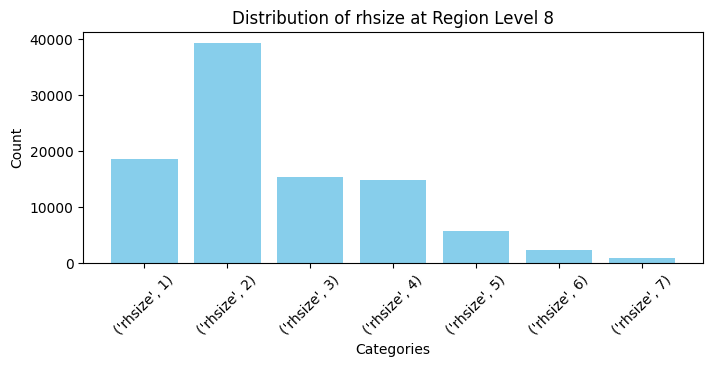

In [17]:
# marginal_distribution
plot_marginal_distribution(household_marginal, region_household_marginal)

Please enter 'geo' or 'region':  region
Please enter geographical area code:  8
Please enter the control variable (e.g., 'rhsize'):  rhsize


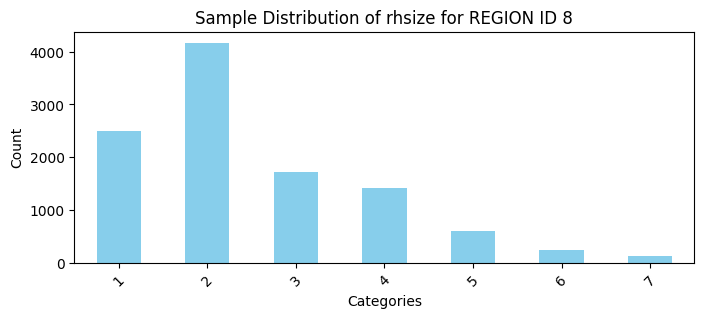

In [18]:
# sample_distribution
plot_sample_distribution(household_sample, geo_sample_mapping, region_geo_mapping)

# Chapter 2. Prepare Configuration File

### Configuration File:
- `configuration.yaml` or `configuration_arizona`

**please open `configuration_arizona.yaml` in the Arizona folder**

###  Configuration.yaml Key Sections:  

The `configuration.yaml` file is essential for getting PopGen started. It has many parts, but you really only need to focus on a few key sections for initial setup and later modification.

#### Project Wide Setting:

This section outlines the fundamental settings needed to commence a synthetic population project.

```yaml
# Determine whether to synthesize the population
synthesize: True  # True for generating a synthetic population, 
# Project name
name: Arizona_Synthetic_Population  # Name of the project. you can name your project
# Project location
location: ./Arizona/  # Path to the input data folder. Use forward slashes as separators, e.g., C:/SynTest/Houston/.


#### Input Data Files:

The Input Section specifies the data entities involved in the analysis, their identifying column names, and the locations for all necessary CSV input files.

```yaml
inputs:
  # Define entities present in the synthetic population
  entities: [household, groupquarter, person]
  housing_entities: [household, groupquarter]
  person_entities: [person]
  
  # Specify column names for key identifiers for all data
  column_names:
    hid: hid  # Household ID
    pid: pid  # Person ID
    geo: geo  # Geographical unit
    region: region  # Regional unit
    sample_geo: sample_geo  # Sample geographical unit

  # Paths to CSV files for geographical mappings and sample data
  location:
    geo_corr_mapping:
      geo_to_sample: geo_sample_mapping.csv  
      region_to_sample: region_sample_mapping.csv  
      region_to_geo: region_geo_mapping.csv  
    sample:
      household: household_sample.csv  
      person: person_sample.csv  
      groupquarter: groupquarter_sample.csv  
    marginals:
      geo:
        household: household_marginals.csv  
        person: person_marginals.csv  
        groupquarter: groupquarter_marginals.csv  
      region:
        household: region_household_marginals.csv  
        person: region_person_marginals.csv  
        groupquarter: region_groupquarter_marginals.csv  


#### Control Variables

```yaml
scenario:
  - description: Arizona TAZ Scenario 
    apply_region_controls: True
    control_variables:
      region:
        household: [rinc, hhrtotals]
        groupquarter: [gqrtotals]
        person: [rpsex, rpage, rempl, rptotals]
      geo:
        household: [hinc, hhtotals]
        groupquarter: [gqtotals]
        person: [psex, page, empl, ptotals]


#### Select Study Area
```yaml
geos_to_synthesize:
  region:
    # Leave ids empty if synthesizing all regions or specify with IDs like [8]
    ids: [9]
    all_ids: True  
  geo:
    ids: []  # Specify geo IDs to include or leave empty to include all
    all_ids: True  # Set to True to include all geo units


# Chapter 3. Run PopGen

### Scenario 1: 
**Objective**: 
Generate a synthetic population and corresponding household weights for Region 9 within the Maricopa County Subdivision. The synthetic population should be weighted to ensure that sample data aligns with the observed marginal distributions of key characteristics at the household, group quarter, and person levels. This alignment must be consistent for both census county subdivisions (region levels) and census tracts (geo).

- **Household Level**: Ensure the synthetic population match the marginal distributions for household income (`hinc`) and total households (`hhtotals`).
- **Groupquarter Level**: Align with the marginal distribution for total group quarters (`gqtotals`).
- **Person Level**: Align with the marginal distributions for sex (`psex`), age (`page`), employment status (`empl`), and total persons (`ptotals`).


**Key Information**:

- **Study Region**: 9

- **Control Variables**:
  - **Geo Level**:
    - **Household**: `hinc`, `hhtotals`
    - **Person**: `psex`, `page`, `empl`, `ptotals`
    - **Groupquarter**: `gqtotals`
  - **Region Level**:
    - **Household**: `rhinc`, `hhrtotals`
    - **Person**: `rpsex`, `rpage`, `rempl`, `rptotals`
    - **Groupquarter**: `gqtotals`

## Execute PopGen Software

**Open the `data` folder :**
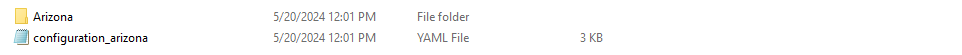

### Step 1. Check Configuration File
Open `configuration_arizona.yaml` in `\data` folder.

Ensure the file has been modified to contains all above "key information" from Scenario 1.

### Step 2. Check Input Files
Verify all required input files are present in the `Arizona` folder, and are listed in `configuration_arizona.yaml` correctly.


### Step 3. Run `PopGen3`

In [ ]:
from popgen import Project
config_dir = '..' 
os.chdir(config_dir)

# Initialize the project with the relative path to the configuration file
p_obj = Project('./configuration_arizona.yaml')
p_obj.load_project()
p_obj.run_scenarios()

	IPF for Entity: household complete
	IPF for Entity: groupquarter complete
	IPF for Entity: person complete
	IPF for Entity: household complete
	IPF for Entity: groupquarter complete
	IPF for Entity: person complete
	Rounding frequencies for Entity: household complete
	Rounding frequencies for Entity: groupquarter complete
	ipu for Region: 9
geo_ids for region 9: [4013010101, 4013010102]


### You should see the below results indicating the success of running popgen!

# Chapter 4: Results Interpretation

After the execution, you will find a new results folder named similar to **'2024-04-04 00-00-00 Arizona TAZ Scenario'** in the `Arizona` folder.

This folder contains the output of the PopGen process.

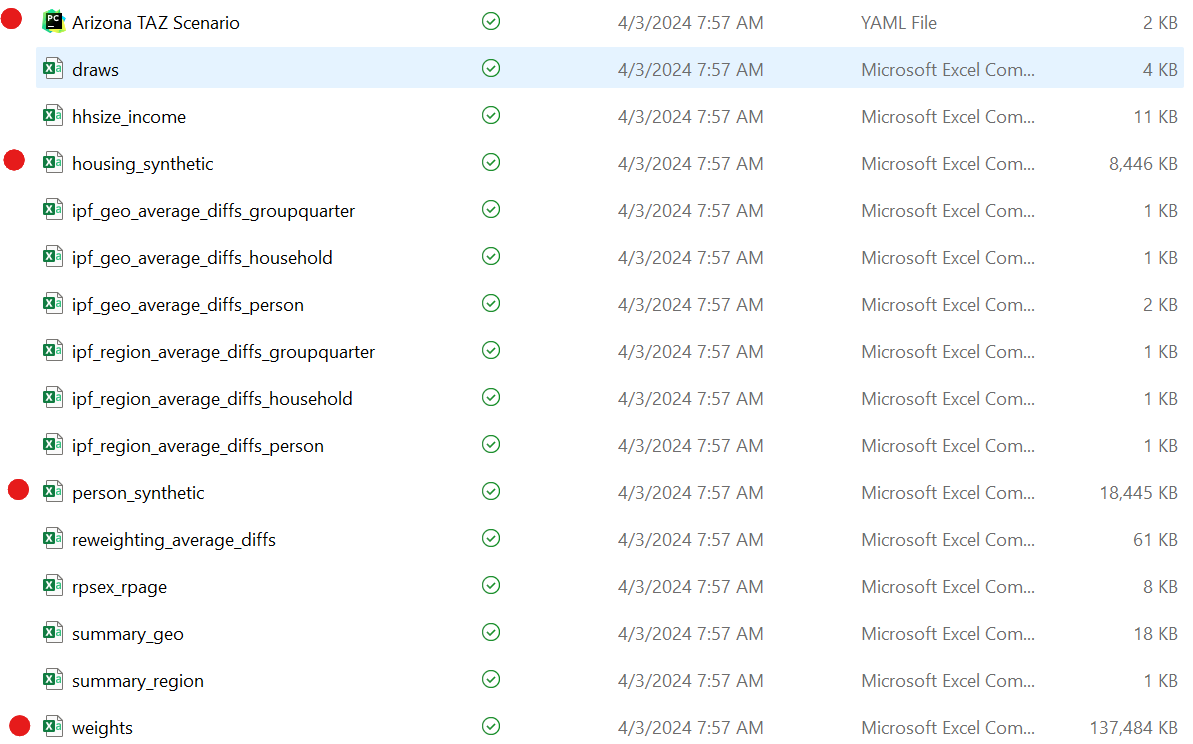

## Key Files to Check:

Within the results folder, please pay special attention to the crucial files:

- `housing_synthetic.csv`: Contains the synthetic housing data generated by the process.
- `person_synthetic.csv`: Contains the synthetic people data.
- `weights.csv`: Holds the weights assigned to each synthetic household to match the marginal distributions.
- `Arizona TAZ Scenario.yaml`: Contains all Scenario design we put in `configuration_arizona.yaml`.

## 1.Reviewing `weights.csv`:
In the `weights.csv` file, weights are aligned with `hid`, with each column corresponding to a specific geo ID.

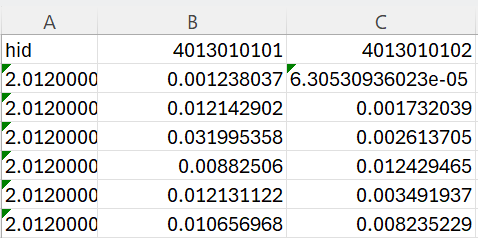

## 2. Moving Synthetic Data Files

Please move the following files into the `Arizona` folder, ensuring they are located alongside all input files:

- `housing_synthetic.csv`
- `person_synthetic.csv`

Read the person and housing synthetic data 

In [21]:
# Read the person_synthetic and housing_synthetic data
person_synthetic = pd.read_csv('person_synthetic.csv')
housing_synthetic = pd.read_csv('housing_synthetic.csv')

## 3. Verifying Alignment with Marginal Distribution

To ensure the synthetic population accurately reflects the marginal distribution, we perform a comparison between the marginal data and the synthesized population data. 

The code below is designed to count the number of synthesized people and households within each geographical unit (geo) and compare these counts against the marginal distributions:

In [22]:
# Create a list containing all unique variable names
person_variable_names_list = person_marginal.columns.get_level_values(0).unique().tolist()
# Create a list containing all unique household variable names
household_variable_names_list = household_marginal.columns.get_level_values(0).unique().tolist()
# Unique GEOs can come from either person_synthetic or housing_synthetic, assuming they're the same
unique_geos = person_synthetic['geo'].unique()

output_folder = 'comparison'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
    
for geo in unique_geos:
    with PdfPages(os.path.join(output_folder, f'geo_{geo}_charts.pdf')) as pdf:
        fig_person = plot_variables_in_subplots(person_variable_names_list, person_synthetic, person_marginal, geo, 'Person')
        pdf.savefig(fig_person, bbox_inches='tight')
        plt.close(fig_person)

        fig_household = plot_variables_in_subplots(household_variable_names_list, housing_synthetic, household_marginal, geo, 'Household')
        pdf.savefig(fig_household, bbox_inches='tight')
        plt.close(fig_household)

**Reviewing the Comparison Outputs:**

Open the generated `comparison` folder. Inside, you'll find PDF files created for each geographical unit (geo), designed to visually compare the synthetic population with the marginal data. 

For example, our control variables include:

- **Geo Level**:
  - **Household**: `hinc`, `hhtotals`
  - **Person**: `psex`, `page`, `empl`, `ptotals`

If the control variables are correctly selected and applied, then the synthetic population's marginal distribution should closely align with the observed data.

**Frequently Asked Questions:**

**Question 1:** Why isn't the person distribution perfectly matched?

**Question 2:** Why don't we need to check regional marginal distribution?

*Because we've already verified the consistency between geo-level and region-level marginal distributions. If each geo-level sythetic distribution aligns with its marginal data, then, by extension, the aggregated regional distributions should also align.*

For more detailed of consistency, please refer to the previous section **"Checking Consistency Between Regional and Geo Marginal Data."**


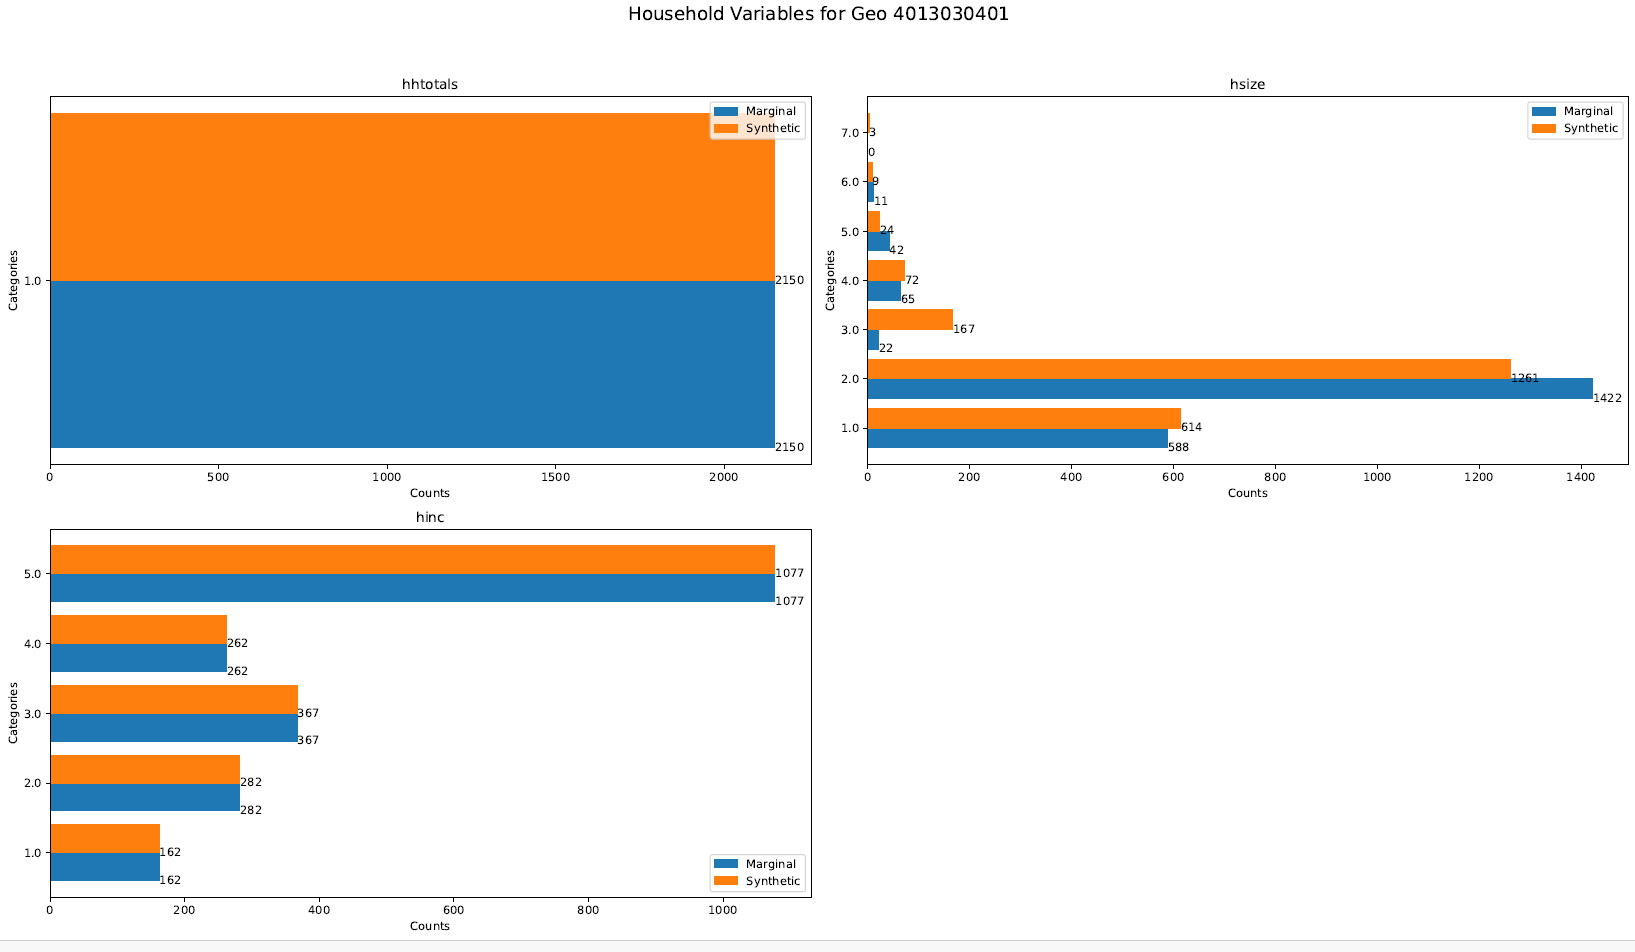

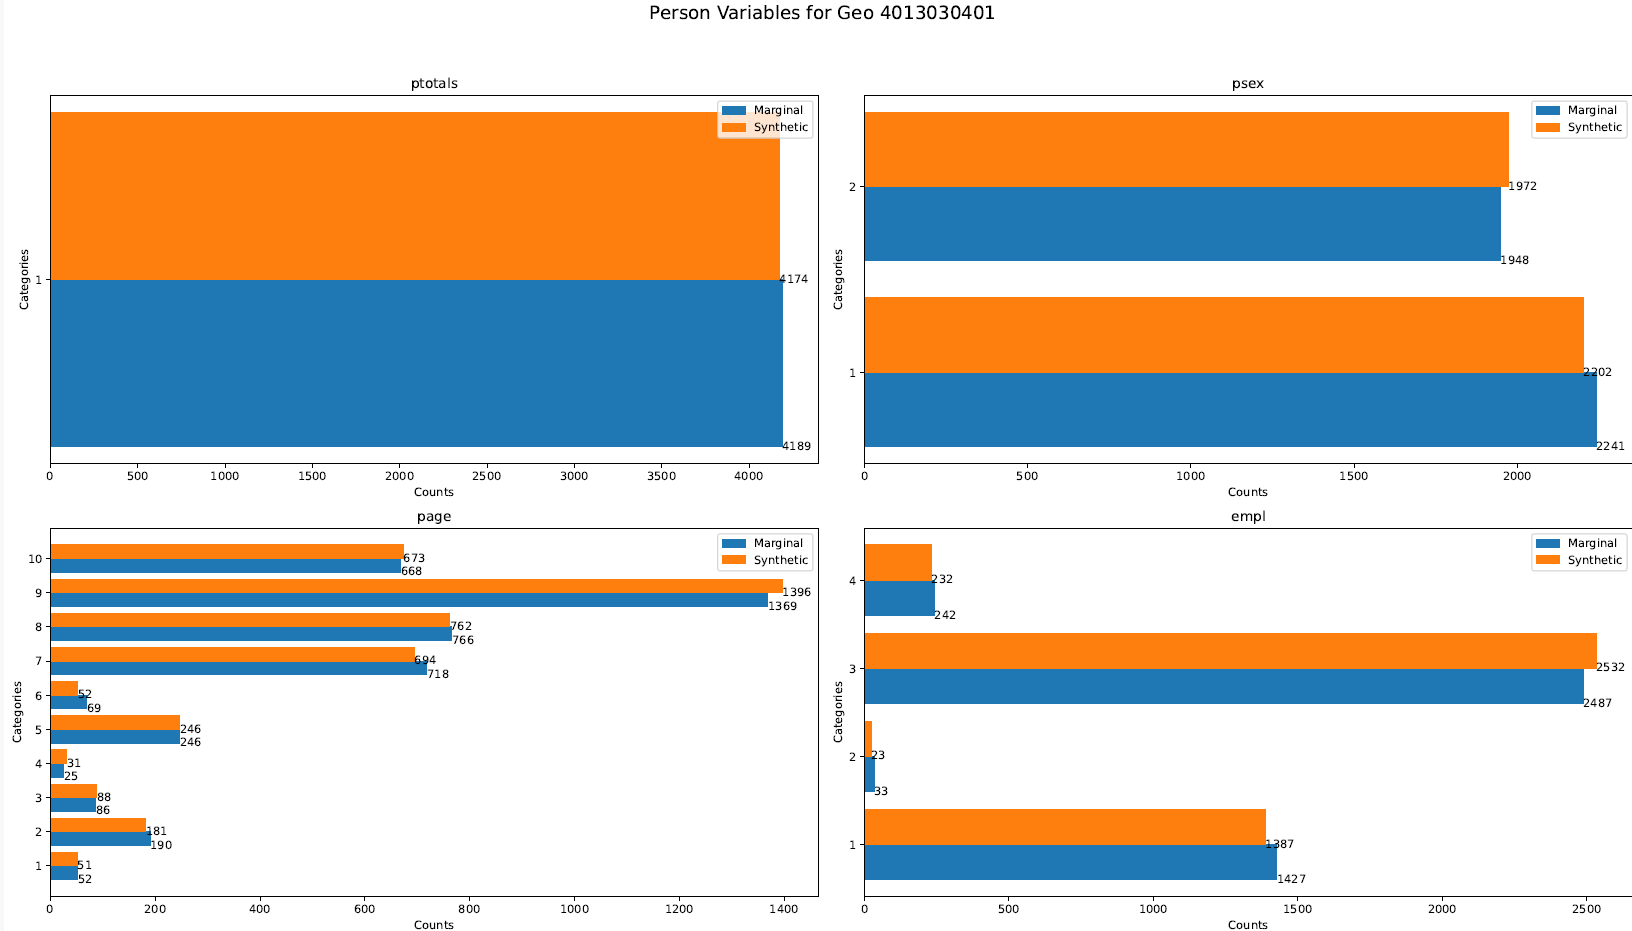

# Chapter 5: Try different Scenarios: 

### Scenario 2:

We want to change control variable household income (`hinc`) to household size (`hsize`)

Now control variables are:

- **Control Variables**:
  - **Geo Level**:
    - **Household**: `hsize`, `hhtotals`
    - **Person**: `psex`, `page`, `empl`, `ptotals`
    - **Groupquarter**: `gqtotals`
  - **Region Level**:
    - **Household**: `rhsize`, `hhrtotals`
    - **Person**: `rpsex`, `rpage`, `rempl`, `rptotals`
    - **Groupquarter**: `gqtotals`

### Repeat Chaper 4 for Results Interpretation